In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


<b>Preprocessing/Scaling: Since our columns are on different scale it is important to perform scaling on them</b>

In [9]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df[['price']])
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

<b>We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D</b>

In [13]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# 1. Batch GD

In [20]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]   # number of columns or features in X
    # numpy array with 1 row and columns equal to number of features. 
    # in our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]  # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))   # MSE
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost
    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

<b>Now plot epoch vs cost graph to see how cost reduces as number of epoch increases</b>

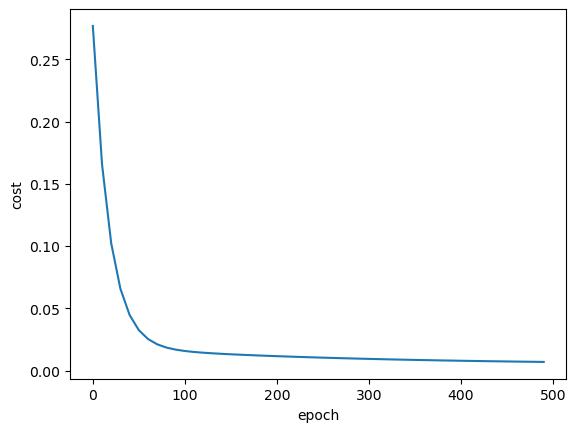

In [21]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [22]:
def predict(area, bedroom, w, b):
    scaled_x = sx.transform([[area, bedroom]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\mansh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [23]:
predict(1500,3,w,b)

C:\Users\mansh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

# 2. Stochastic GD

<b>Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights</b>

In [26]:
import random

In [37]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]   # number of columns or features in X
    # numpy array with 1 row and columns equal to number of features. 
    # in our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]  # number of rows in X
    
    cost_list_sgd = []
    epoch_list_sgd = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))   # MSE
        
        if i%100==0:
            cost_list_sgd.append(cost)
            epoch_list_sgd.append(i)
            
    return w, b, cost, cost_list_sgd, epoch_list_sgd

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70484076, 0.67409222]), -0.2289726722592989, 0.1999463349744358)

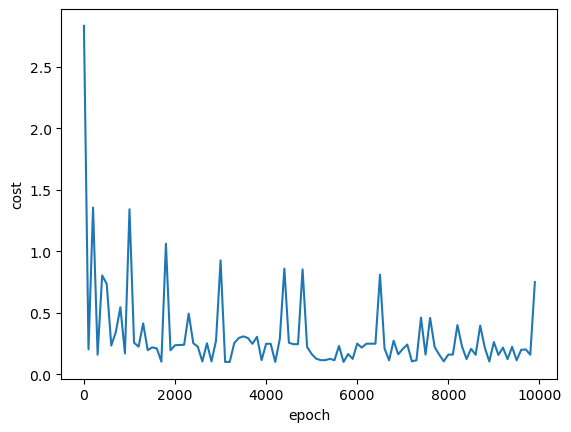

In [38]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [39]:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\mansh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.40132086345224

# 3. Mini Batch GD 

In [46]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71012406, 0.67824638]), -0.2333872550014424, 0.00711474066849477)

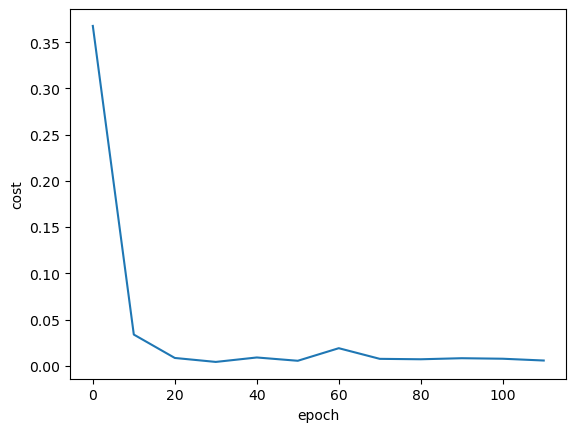

In [47]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)